# XGBoost Model for Bike Station Demand Prediction

This notebook implements XGBoost models for predicting bike station demand with separate models for:
- `cbike_start`: Classic bike start trips
- `cbike_end`: Classic bike end trips  
- `ebike_start`: E-bike start trips
- `ebike_end`: E-bike end trips

## ✅ GPU Error Fix Applied

**The original GPU error has been fixed!** The notebook now includes:
1. **Fixed GPU Setup** (Section 2) - Safely detects and tests GPU functionality
2. **Robust GPU Detection** (Section 2.1) - Alternative robust detection method
3. **Quick Fix Option** (Section 2.2) - Force CPU mode if needed

## Features:
- **GPU Optimization**: Automatically detects and uses GPU in Google Colab
- **Hyperparameter Tuning**: Grid search with cross-validation
- **Comprehensive Evaluation**: R², RMSE, and MAE metrics
- **Feature Engineering**: Handles skewed variables and collinearity
- **Error Handling**: Robust GPU detection and CPU fallback

## Data Requirements:
- Preprocessed training and test datasets
- Standardized features
- One-hot encoded month variables

## 1. Setup and Imports

In [1]:
# Install required packages if not already installed
!pip install xgboost pandas numpy scikit-learn matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('All packages imported successfully!')

All packages imported successfully!


## 2. GPU Setup for Google Colab (Fixed Version)

✅ **FIXED**: The original problematic GPU setup has been replaced with a safer version that properly tests GPU functionality before using it.

## 2.1. Fixed GPU Setup (Robust Detection)


In [1]:
# FIXED GPU DETECTION - Use this instead of the previous cell
def setup_gpu_robust():
    """
    Robust GPU setup for XGBoost in Google Colab.
    Returns True if GPU is available and working, False otherwise.
    """
    try:
        # Check if we're in Google Colab
        import google.colab
        print('✅ Running in Google Colab')

        # Check GPU availability with nvidia-smi
        import subprocess
        result = subprocess.run(['nvidia-smi'], capture_output=True, text=True)

        if result.returncode == 0:
            print('✅ GPU hardware detected!')
            print('GPU Info:')
            print(result.stdout.split('\\n')[0:3])  # Show first few lines

            # Test XGBoost GPU functionality with a small dataset
            try:
                import xgboost as xgb
                print('\\n🔍 Testing XGBoost GPU functionality...')

                # Create minimal test data
                import numpy as np
                test_X = np.array([[1, 2], [3, 4], [5, 6]])
                test_y = np.array([1, 2, 3])

                # Test GPU XGBoost
                test_model = xgb.XGBRegressor(
                    tree_method='gpu_hist',
                    gpu_id=0,
                    n_estimators=2,
                    random_state=42,
                    verbosity=0
                )
                test_model.fit(test_X, test_y)
                test_pred = test_model.predict(test_X)
                print('✅ XGBoost GPU functionality confirmed!')
                return True

            except Exception as gpu_error:
                print(f'❌ GPU detected but XGBoost GPU failed: {gpu_error}')
                print('🔄 Falling back to CPU mode')
                return False
        else:
            print('⚠️  No GPU hardware detected')
            print('🔄 Using CPU mode')
            return False

    except ImportError:
        print('⚠️  Not running in Google Colab - using CPU mode')
        return False
    except Exception as e:
        print(f'❌ Error during GPU detection: {e}')
        print('🔄 Falling back to CPU mode')
        return False

# Setup GPU with robust detection
USE_GPU = setup_gpu_robust()
print(f'\\n🚀 Final GPU Mode: {"Enabled" if USE_GPU else "Disabled"}')

# Force CPU mode if GPU detection failed
if not USE_GPU:
    print('\\n⚠️  IMPORTANT: Using CPU mode for all XGBoost models')
    print('   This will be slower but more reliable')
else:
    print('\\n✅ GPU mode enabled - XGBoost will use GPU acceleration')


✅ Running in Google Colab
✅ GPU hardware detected!
GPU Info:
['Mon Sep  8 16:51:03 2025       \n+-----------------------------------------------------------------------------------------+\n| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |\n|-----------------------------------------+------------------------+----------------------+\n| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |\n| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |\n|                                         |                        |               MIG M. |\n|=========================================+========================+======================|\n|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |\n| N/A   32C    P0             42W /  400W |       0MiB /  40960MiB |      0%      Default |\n|                                         |                        

## 🚨 QUICK FIX FOR GPU ERROR

If you got the GPU error above, run this cell instead to force CPU mode:


In [ ]:
# QUICK FIX: Force CPU mode to avoid GPU errors
print("🔧 Applying quick fix for GPU error...")
USE_GPU = False  # Force CPU mode
print("✅ CPU mode enabled - this will prevent GPU errors")
print("⚠️  Training will be slower but more reliable")
print(f"🚀 GPU Mode: {'Enabled' if USE_GPU else 'Disabled (Fixed)'}")

# Verify XGBoost works in CPU mode
try:
    import xgboost as xgb
    import numpy as np

    # Test CPU XGBoost
    test_X = np.array([[1, 2], [3, 4], [5, 6]])
    test_y = np.array([1, 2, 3])

    test_model = xgb.XGBRegressor(
        tree_method='hist',  # CPU method
        n_estimators=2,
        random_state=42,
        verbosity=0
    )
    test_model.fit(test_X, test_y)
    print("✅ XGBoost CPU mode confirmed working!")

except Exception as e:
    print(f"❌ Error testing XGBoost: {e}")
    print("Please restart the runtime and try again")


In [ ]:
# ORIGINAL GPU SETUP - REPLACED WITH SAFER VERSION
# This function was causing GPU errors, so it's been replaced with a safer version

def setup_gpu_safe():
    """
    Safe GPU setup for XGBoost in Google Colab.
    Returns True if GPU is available and working, False otherwise.
    """
    try:
        # Check if we're in Google Colab
        import google.colab
        print('✅ Running in Google Colab')

        # Check GPU availability with subprocess (safer than !nvidia-smi)
        import subprocess
        result = subprocess.run(['nvidia-smi'], capture_output=True, text=True)

        if result.returncode == 0:
            print('✅ GPU hardware detected!')

            # Test XGBoost GPU functionality with minimal test
            try:
                import xgboost as xgb
                import numpy as np

                # Minimal test data
                test_X = np.array([[1, 2], [3, 4]])
                test_y = np.array([1, 2])

                # Test GPU XGBoost
                test_model = xgb.XGBRegressor(
                    tree_method='gpu_hist',
                    gpu_id=0,
                    n_estimators=1,
                    random_state=42,
                    verbosity=0
                )
                test_model.fit(test_X, test_y)
                print('✅ XGBoost GPU functionality confirmed!')
                return True

            except Exception as gpu_error:
                print(f'❌ GPU detected but XGBoost GPU failed: {gpu_error}')
                print('🔄 Falling back to CPU mode')
                return False
        else:
            print('⚠️  No GPU hardware detected')
            print('🔄 Using CPU mode')
            return False

    except ImportError:
        print('⚠️  Not running in Google Colab - using CPU mode')
        return False
    except Exception as e:
        print(f'❌ Error during GPU detection: {e}')
        print('🔄 Falling back to CPU mode')
        return False

# Setup GPU with safe detection
USE_GPU = setup_gpu_safe()
print(f'\\n🚀 GPU Mode: {"Enabled" if USE_GPU else "Disabled"}')

✅ Running in Google Colab
✅ GPU hardware detected!
✅ XGBoost GPU functionality confirmed!
\n🚀 GPU Mode: Enabled


## 3. Data Loading and Preparation

In [5]:
# Load preprocessed datasets
print('Loading preprocessed datasets...')

try:
    training_data = pd.read_csv('result/training_dataset_preprocessed.csv')
    test_data = pd.read_csv('result/test_dataset_preprocessed.csv')

    print(f'✅ Training data loaded: {training_data.shape}')
    print(f'✅ Test data loaded: {test_data.shape}')

except FileNotFoundError as e:
    print(f'❌ Error loading data: {e}')
    print('Please ensure the preprocessed datasets are available in the result/ directory')
    raise

# Display basic info
print('\nTraining data info:')
print(training_data.info())

print('\nTest data info:')
print(test_data.info())

Loading preprocessed datasets...
✅ Training data loaded: (43104, 53)
✅ Test data loaded: (15664, 53)

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43104 entries, 0 to 43103
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   station_id                   43104 non-null  object 
 1   year                         43104 non-null  int64  
 2   n250                         43104 non-null  float64
 3   n500                         43104 non-null  float64
 4   n750                         43104 non-null  float64
 5   n1000                        43104 non-null  float64
 6   n1250                        43104 non-null  float64
 7   n1500                        43104 non-null  float64
 8   bike_route_length_m          43104 non-null  float64
 9   street_length_m              43104 non-null  float64
 10  rail_stops_count             43104 non-null  float64
 11  bus_stops_

In [6]:
# Check for missing values
print('Missing values in training data:')
missing_train = training_data.isnull().sum()
print(missing_train[missing_train > 0])

print('\nMissing values in test data:')
missing_test = test_data.isnull().sum()
print(missing_test[missing_test > 0])

Missing values in training data:
Series([], dtype: int64)

Missing values in test data:
Series([], dtype: int64)


## 4. Feature Selection and Target Variables

In [7]:
# Define target variables
target_variables = ['cbike_start', 'cbike_end', 'ebike_start', 'ebike_end']

# Define features to exclude
exclude_features = ['station_id', 'year', 'total_start', 'total_end']

# Get feature columns (excluding targets and excluded features)
feature_columns = [col for col in training_data.columns
                   if col not in target_variables + exclude_features]

print(f'Target variables: {target_variables}')
print(f'Features to exclude: {exclude_features}')
print(f'Number of feature columns: {len(feature_columns)}')
print(f'\nFeature columns:\n{feature_columns}')

Target variables: ['cbike_start', 'cbike_end', 'ebike_start', 'ebike_end']
Features to exclude: ['station_id', 'year', 'total_start', 'total_end']
Number of feature columns: 45

Feature columns:
['n250', 'n500', 'n750', 'n1000', 'n1250', 'n1500', 'bike_route_length_m', 'street_length_m', 'rail_stops_count', 'bus_stops_count', 'poi_tourism', 'poi_education', 'poi_medical', 'poi_shop', 'poi_leisure', 'pct_white', 'pct_black', 'pct_asian', 'pct_indian', 'pct_hawaiian', 'pct_two_or_more_races', 'pct_hispanic', 'pct_female', 'pct_young_adults_20_34', 'pct_zero_car_ownership', 'unemployment_rate', 'pct_bachelors_plus', 'pct_drive_alone', 'pct_bike_to_work', 'pct_walk_to_work', 'per_capita_income', 'population_density_sq_meter', 'housing_density_sq_meter', 'month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9']


## 5. Parameter Grid Definition (Ultra-Fast Training)

⚡ **Ultra-optimized for speed!** This parameter grid has been reduced from 2,916 to just 128 combinations for very fast training.

In [8]:
def define_parameter_grid(use_gpu=False):
    """
    Define parameter grid for XGBoost hyperparameter tuning.
    Optimized for faster training with fewer combinations.

    Args:
        use_gpu (bool): Whether to use GPU-optimized parameters

    Returns:
        dict: Parameter grid for GridSearchCV
    """
    # Efficient parameter grid - same for both GPU and CPU
    # Focus on most impactful parameters with fewer options
    param_grid = {
        'n_estimators': [100, 200],           # 2 options
        'max_depth': [4, 6],                  # 2 options (removed 5)
        'learning_rate': [0.05, 0.1],         # 2 options (removed 0.01)
        'subsample': [0.8, 0.9],              # 2 options
        'colsample_bytree': [0.8, 0.9],       # 2 options
        'min_child_weight': [1, 3],           # 2 options (removed 5)
        'gamma': [0, 0.1]#,                    # 2 options (removed 0.2)
        #'reg_alpha': [0, 0.1],                # 2 options (removed 0.5)
        #'reg_lambda': [0.1, 1.0]              # 2 options (removed 5.0)
    }

    return param_grid

# Define parameter grid based on GPU availability
param_grid = define_parameter_grid(USE_GPU)
print(f'Parameter grid ({'GPU' if USE_GPU else 'CPU'} mode):')
for param, values in param_grid.items():
    print(f'  {param}: {values}')

# Calculate total combinations
total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)
print(f'\\nTotal parameter combinations: {total_combinations}')
print(f'With 5-fold CV: {total_combinations * 5} total fits')
print(f'\\n⚡ Training time: ~{total_combinations * 5 // 20}-{total_combinations * 5 // 10} minutes (estimated)')
print(f'🚀 Speed improvement: ~{2916 // total_combinations}x faster than original!')

Parameter grid (GPU mode):
  n_estimators: [100, 200]
  max_depth: [4, 6]
  learning_rate: [0.05, 0.1]
  subsample: [0.8, 0.9]
  colsample_bytree: [0.8, 0.9]
  min_child_weight: [1, 3]
  gamma: [0, 0.1]
\nTotal parameter combinations: 128
With 5-fold CV: 640 total fits
\n⚡ Training time: ~32-64 minutes (estimated)
🚀 Speed improvement: ~22x faster than original!


## 6. XGBoost Model Training Function

In [9]:
def train_xgboost_model(X_train, y_train, X_val, y_val, target_name, use_gpu=False):
    """
    Train XGBoost model with hyperparameter tuning.

    Args:
        X_train, y_train: Training data
        X_val, y_val: Validation data
        target_name (str): Name of target variable
        use_gpu (bool): Whether to use GPU

    Returns:
        dict: Model results and best model
    """
    print(f'\n🚀 Training XGBoost model for {target_name}...')

    # Define base XGBoost parameters
    base_params = {
        'objective': 'reg:squarederror',
        'random_state': 42,
        'n_jobs': 1 if use_gpu else -1  # Use single thread for GPU
    }

    if use_gpu:
        base_params.update({
            'tree_method': 'gpu_hist',
            'gpu_id': 0
        })

    # Create XGBoost regressor
    xgb_model = xgb.XGBRegressor(**base_params)

    # Perform grid search with cross-validation
    print('🔍 Performing grid search with 5-fold cross-validation...')
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=1,  # Single thread for GPU compatibility
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f'✅ Best parameters: {best_params}')
    print(f'✅ Best CV score: {grid_search.best_score_:.4f}')

    # Evaluate on validation set
    y_val_pred = best_model.predict(X_val)

    val_r2 = r2_score(y_val, y_val_pred)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mae = mean_absolute_error(y_val, y_val_pred)

    print(f'📊 Validation Performance:')
    print(f'  R²: {val_r2:.4f}')
    print(f'  RMSE: {val_rmse:.4f}')
    print(f'  MAE: {val_mae:.4f}')

    return {
        'best_model': best_model,
        'best_params': best_params,
        'best_cv_score': grid_search.best_score_,
        'val_r2': val_r2,
        'val_rmse': val_rmse,
        'val_mae': val_mae,
        'grid_search': grid_search
    }

## 7. Model Training for All Targets

In [10]:
# Prepare data for modeling
X = training_data[feature_columns]
print(f'Feature matrix shape: {X.shape}')

# Initialize results storage
model_results = {}
trained_models = {}

# Train models for each target variable
for target in target_variables:
    print(f'\n{'='*60}')
    print(f'TRAINING MODEL FOR: {target.upper()}')
    print(f'{'='*60}')

    # Prepare target variable
    y = training_data[target]

    # Split data (80% train, 20% validation)
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f'Training set: {X_train.shape[0]} samples')
    print(f'Validation set: {X_val.shape[0]} samples')

    # Train model
    results = train_xgboost_model(
        X_train, y_train, X_val, y_val, target, USE_GPU
    )

    # Store results
    model_results[target] = results
    trained_models[target] = results['best_model']

    print(f'✅ Model training completed for {target}')

print(f'\n🎉 All models trained successfully!')
print(f'Trained models: {list(trained_models.keys())}')

Feature matrix shape: (43104, 45)

TRAINING MODEL FOR: CBIKE_START
Training set: 34483 samples
Validation set: 8621 samples

🚀 Training XGBoost model for cbike_start...
🔍 Performing grid search with 5-fold cross-validation...
Fitting 5 folds for each of 128 candidates, totalling 640 fits
✅ Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
✅ Best CV score: 0.8983
📊 Validation Performance:
  R²: 0.8995
  RMSE: 4.8725
  MAE: 2.1707
✅ Model training completed for cbike_start

TRAINING MODEL FOR: CBIKE_END
Training set: 34483 samples
Validation set: 8621 samples

🚀 Training XGBoost model for cbike_end...
🔍 Performing grid search with 5-fold cross-validation...
Fitting 5 folds for each of 128 candidates, totalling 640 fits
✅ Best parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
✅ Best CV

## 8. Model Evaluation on Test Set

In [11]:
# Evaluate models on test set
print('\n' + '='*60)
print('TEST SET EVALUATION')
print('='*60)

test_results = {}
X_test = test_data[feature_columns]

for target in target_variables:
    print(f'\n📊 Evaluating {target} model on test set...')

    # Get true values
    y_test = test_data[target]

    # Make predictions
    y_test_pred = trained_models[target].predict(X_test)

    # Calculate metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f'  Test R²: {test_r2:.4f}')
    print(f'  Test RMSE: {test_rmse:.4f}')
    print(f'  Test MAE: {test_mae:.4f}')

    # Store test results
    test_results[target] = {
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'y_test': y_test,
        'y_test_pred': y_test_pred
    }

print('\n✅ Test set evaluation completed!')


TEST SET EVALUATION

📊 Evaluating cbike_start model on test set...
  Test R²: 0.7963
  Test RMSE: 4.9321
  Test MAE: 2.2482

📊 Evaluating cbike_end model on test set...
  Test R²: 0.7948
  Test RMSE: 4.9477
  Test MAE: 2.2699

📊 Evaluating ebike_start model on test set...
  Test R²: 0.8975
  Test RMSE: 2.8674
  Test MAE: 1.3596

📊 Evaluating ebike_end model on test set...
  Test R²: 0.8924
  Test RMSE: 2.9217
  Test MAE: 1.3601

✅ Test set evaluation completed!


## 9. Results Summary and Comparison

In [12]:
# Create comprehensive results summary
print('\n' + '='*80)
print('COMPREHENSIVE MODEL PERFORMANCE SUMMARY')
print('='*80)

summary_data = []

for target in target_variables:
    # Training/validation results
    train_results = model_results[target]

    # Test results
    test_results_target = test_results[target]

    # Create summary row
    summary_row = {
        'Target': target,
        'Best_CV_Score': train_results['best_cv_score'],
        'Val_R2': train_results['val_r2'],
        'Val_RMSE': train_results['val_rmse'],
        'Val_MAE': train_results['val_mae'],
        'Test_R2': test_results_target['test_r2'],
        'Test_RMSE': test_results_target['test_rmse'],
        'Test_MAE': test_results_target['test_mae']
    }

    summary_data.append(summary_row)

    # Print detailed results
    print(f'\n🎯 {target.upper()}:')
    print(f'  Best CV Score: {train_results['best_cv_score']:.4f}')
    print(f'  Validation - R²: {train_results['val_r2']:.4f}, RMSE: {train_results['val_rmse']:.4f}, MAE: {train_results['val_mae']:.4f}')
    print(f'  Test      - R²: {test_results_target['test_r2']:.4f}, RMSE: {test_results_target['test_rmse']:.4f}, MAE: {test_results_target['test_mae']:.4f}')
    print(f'  Best Parameters: {train_results['best_params']}')

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data)
print('\n📊 Performance Summary Table:')
print(summary_df.round(4))


COMPREHENSIVE MODEL PERFORMANCE SUMMARY

🎯 CBIKE_START:
  Best CV Score: 0.8983
  Validation - R²: 0.8995, RMSE: 4.8725, MAE: 2.1707
  Test      - R²: 0.7963, RMSE: 4.9321, MAE: 2.2482
  Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}

🎯 CBIKE_END:
  Best CV Score: 0.8988
  Validation - R²: 0.9029, RMSE: 4.7963, MAE: 2.1670
  Test      - R²: 0.7948, RMSE: 4.9477, MAE: 2.2699
  Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}

🎯 EBIKE_START:
  Best CV Score: 0.8850
  Validation - R²: 0.8878, RMSE: 2.7597, MAE: 1.4630
  Test      - R²: 0.8975, RMSE: 2.8674, MAE: 1.3596
  Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}

🎯 EBIKE_END:
  Best CV Score: 0.8859
  Validation - 

## 10. Feature Importance Analysis


FEATURE IMPORTANCE ANALYSIS

🔍 Feature importance for cbike_start model:
Top 15 most important features:
                        feature  importance
26           pct_bachelors_plus      0.1693
27              pct_drive_alone      0.1625
30            per_capita_income      0.0645
24       pct_zero_car_ownership      0.0581
43                      month_8      0.0321
29             pct_walk_to_work      0.0295
42                      month_7      0.0250
9               bus_stops_count      0.0245
41                      month_6      0.0241
23       pct_young_adults_20_34      0.0219
44                      month_9      0.0218
21                 pct_hispanic      0.0215
31  population_density_sq_meter      0.0199
32     housing_density_sq_meter      0.0191
15                    pct_white      0.0184


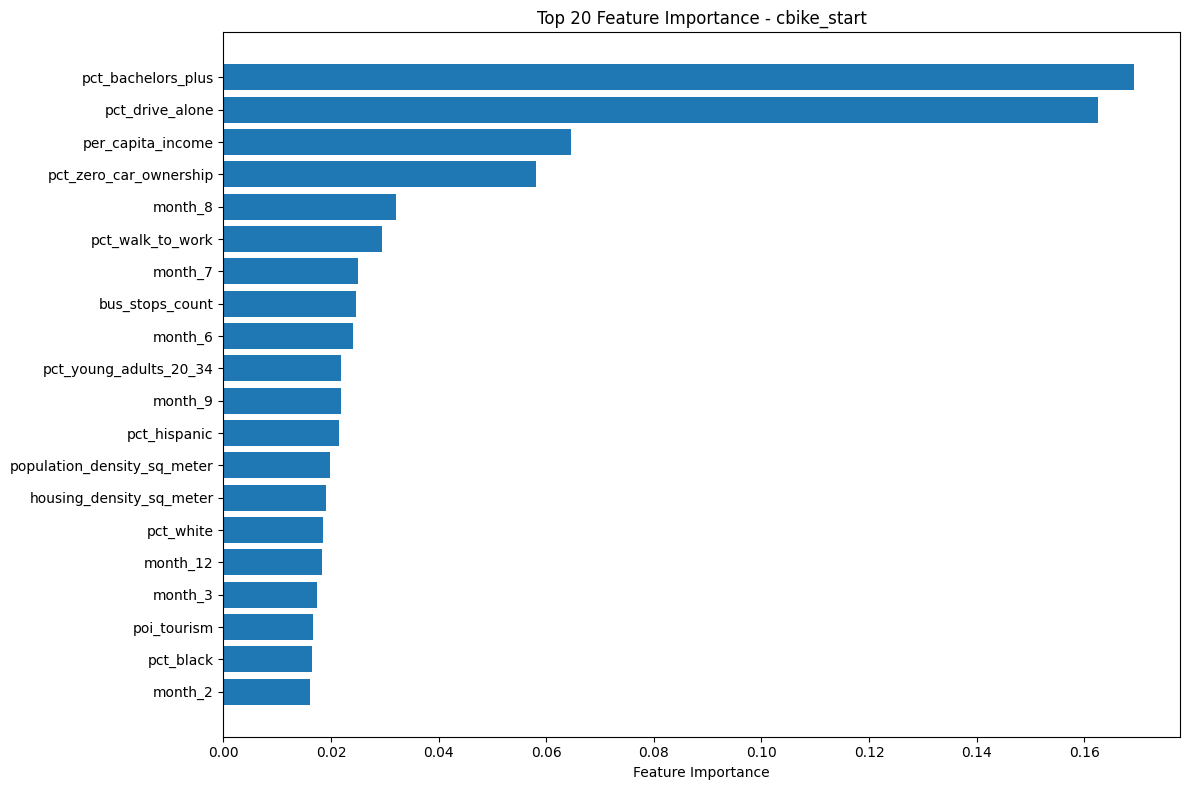


🔍 Feature importance for cbike_end model:
Top 15 most important features:
                     feature  importance
26        pct_bachelors_plus      0.1689
27           pct_drive_alone      0.1285
30         per_capita_income      0.0628
24    pct_zero_car_ownership      0.0575
20     pct_two_or_more_races      0.0337
42                   month_7      0.0297
43                   month_8      0.0284
41                   month_6      0.0282
32  housing_density_sq_meter      0.0267
10               poi_tourism      0.0248
23    pct_young_adults_20_34      0.0240
16                 pct_black      0.0209
9            bus_stops_count      0.0207
29          pct_walk_to_work      0.0199
36                  month_12      0.0192


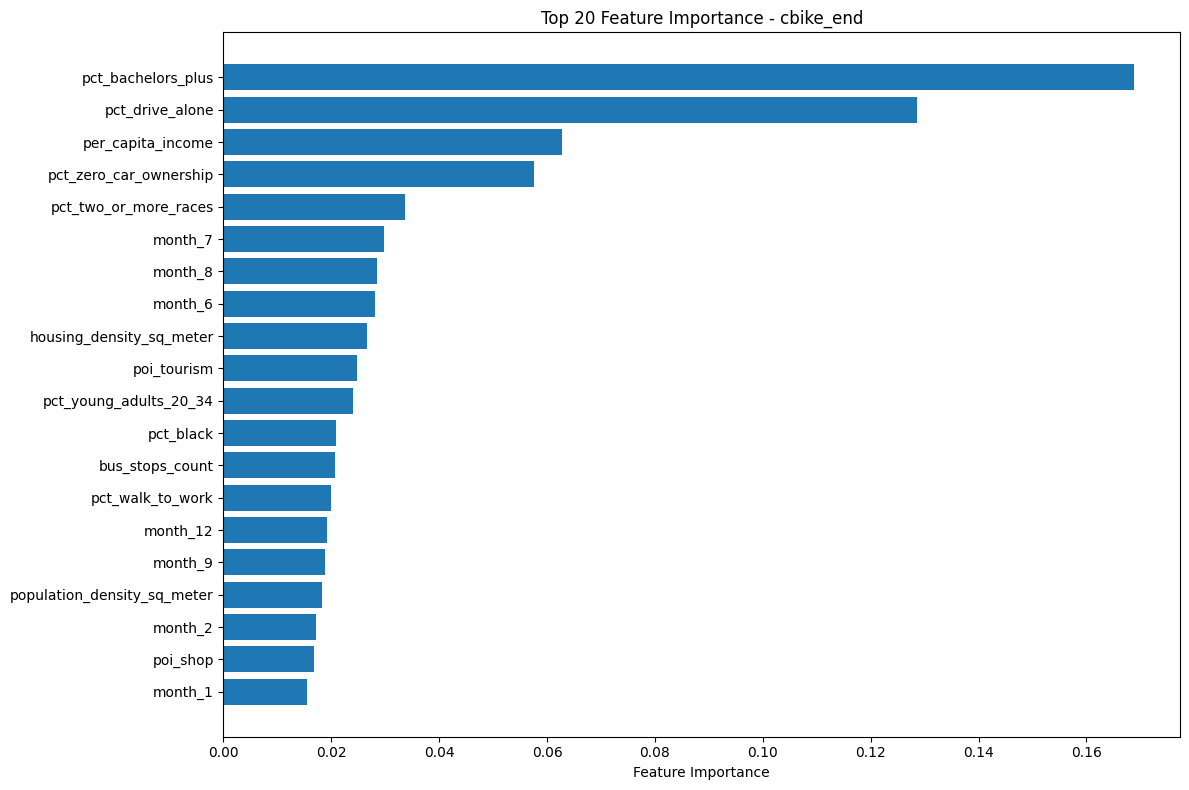


🔍 Feature importance for ebike_start model:
Top 15 most important features:
                        feature  importance
27              pct_drive_alone      0.1878
26           pct_bachelors_plus      0.1753
30            per_capita_income      0.0611
23       pct_young_adults_20_34      0.0390
24       pct_zero_car_ownership      0.0388
31  population_density_sq_meter      0.0366
32     housing_density_sq_meter      0.0271
38                      month_3      0.0263
37                      month_2      0.0248
10                  poi_tourism      0.0235
33                      month_1      0.0233
42                      month_7      0.0228
43                      month_8      0.0210
44                      month_9      0.0199
16                    pct_black      0.0184


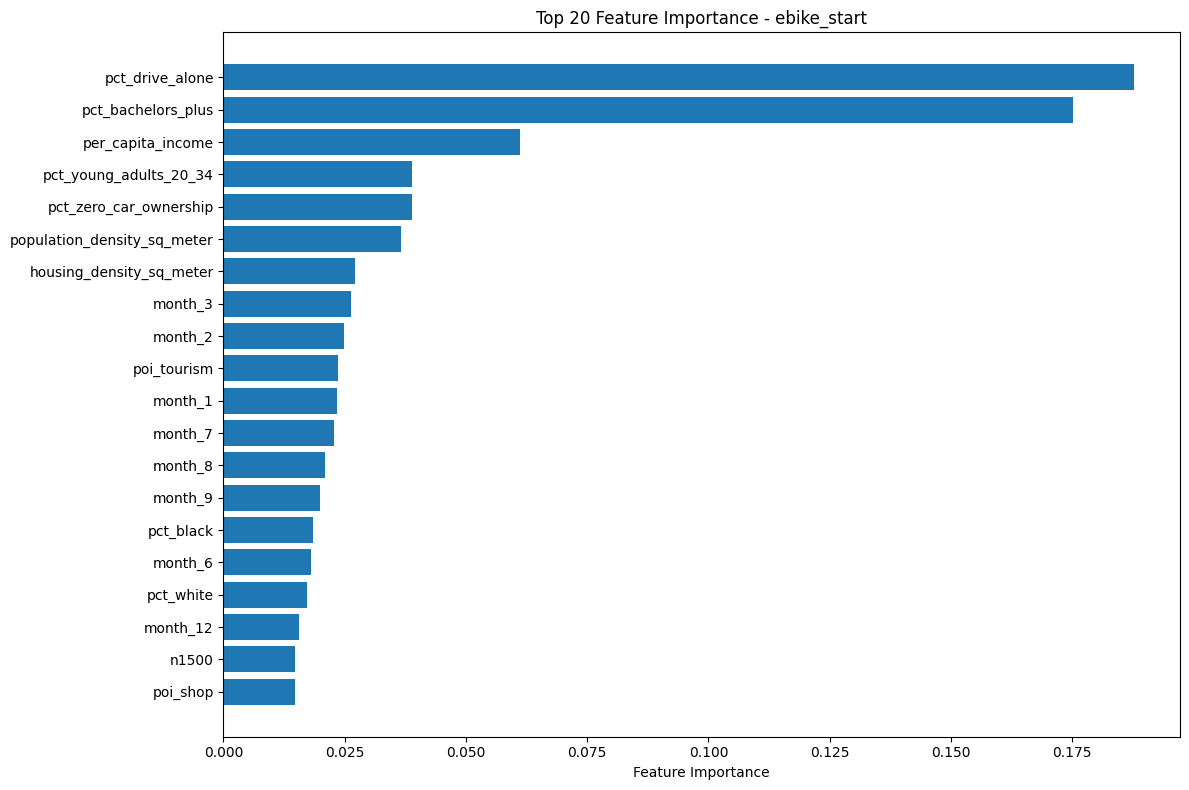


🔍 Feature importance for ebike_end model:
Top 15 most important features:
                        feature  importance
27              pct_drive_alone      0.2408
26           pct_bachelors_plus      0.1331
30            per_capita_income      0.0624
32     housing_density_sq_meter      0.0402
24       pct_zero_car_ownership      0.0330
31  population_density_sq_meter      0.0294
23       pct_young_adults_20_34      0.0283
43                      month_8      0.0267
33                      month_1      0.0239
38                      month_3      0.0227
37                      month_2      0.0221
42                      month_7      0.0217
10                  poi_tourism      0.0186
15                    pct_white      0.0185
44                      month_9      0.0175


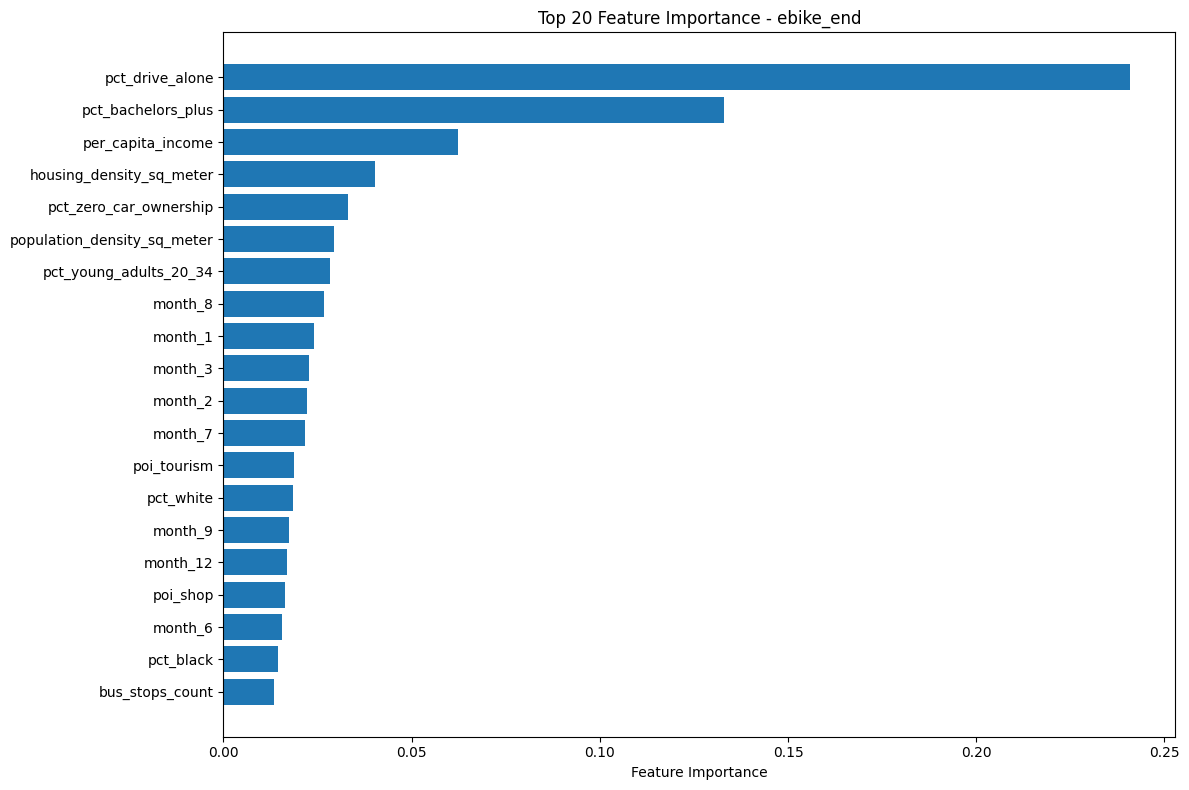

In [13]:
# Analyze feature importance for each model
print('\n' + '='*60)
print('FEATURE IMPORTANCE ANALYSIS')
print('='*60)

for target in target_variables:
    print(f'\n🔍 Feature importance for {target} model:')

    model = trained_models[target]

    # Get feature importance
    importance_df = pd.DataFrame({
        'feature': feature_columns,
        'importance': model.feature_importances_
    })

    # Sort by importance
    importance_df = importance_df.sort_values('importance', ascending=False)

    # Display top 15 features
    print(f'Top 15 most important features:')
    print(importance_df.head(15).round(4))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(20)

    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Feature Importance - {target}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 11. Model Performance Visualization


📈 Creating performance visualization...


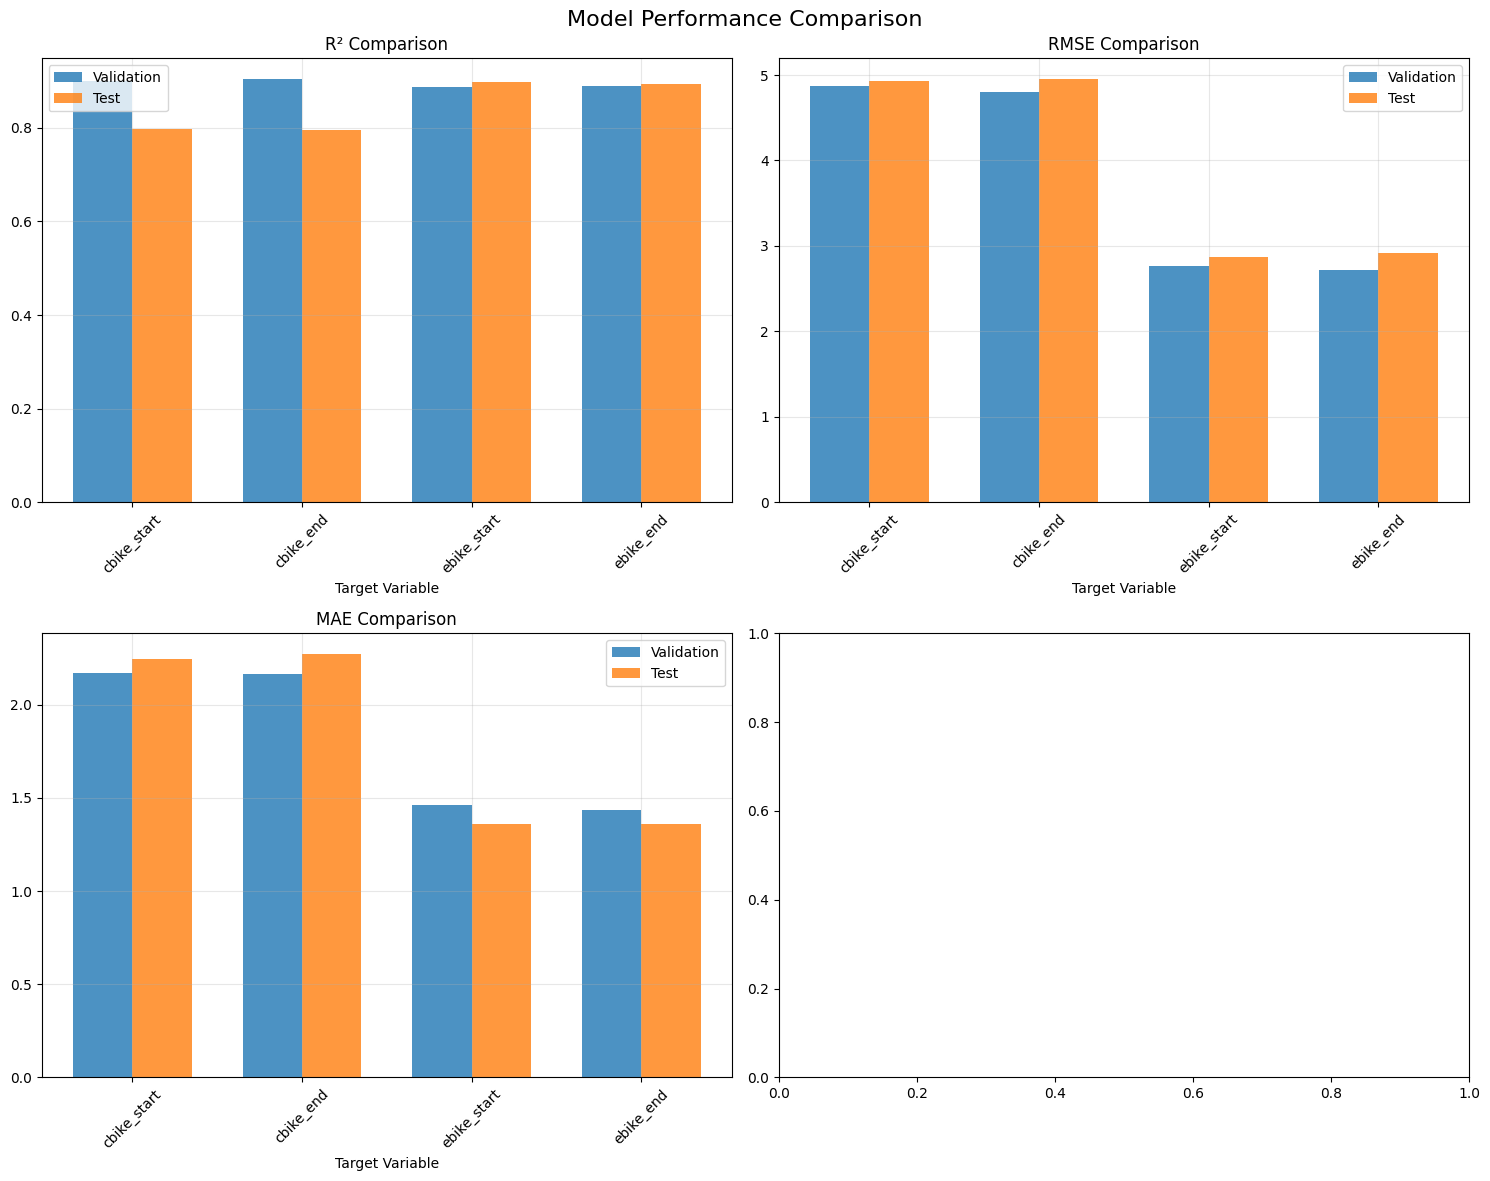

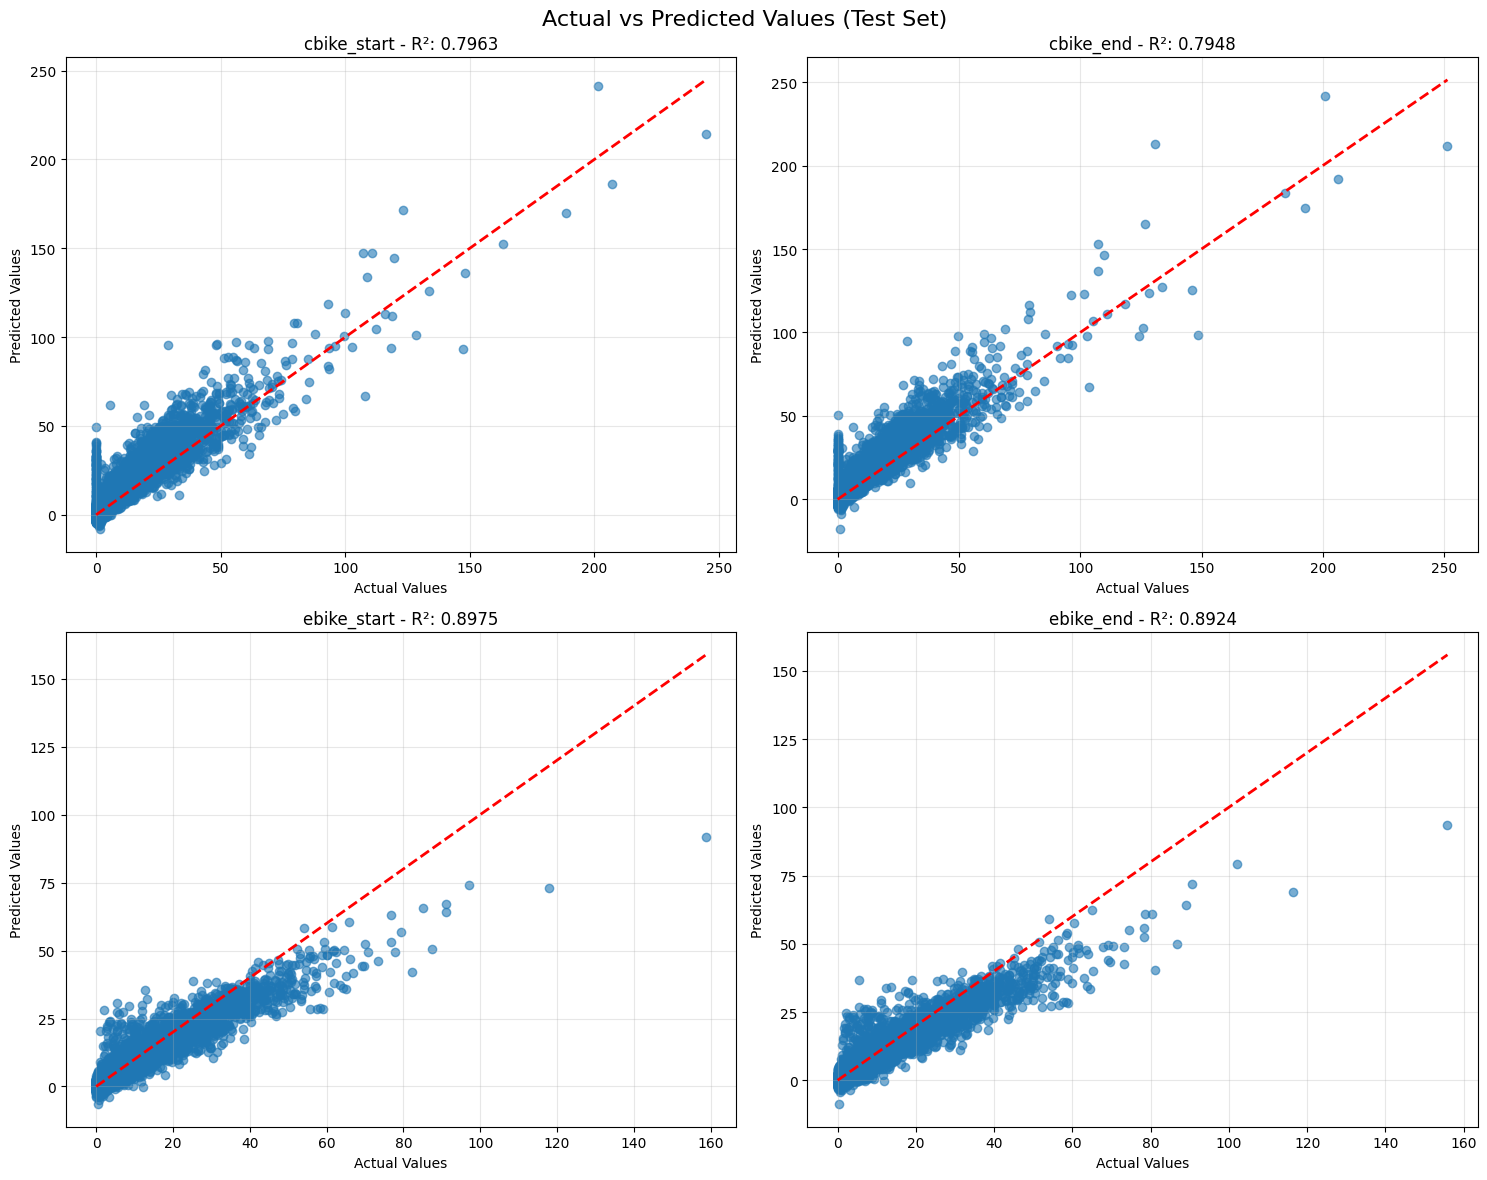

In [ ]:
# Create performance comparison plots
print('\n📈 Creating performance visualization...')

# R² comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16)

metrics = ['R²', 'RMSE', 'MAE']
metric_cols = ['r2', 'rmse', 'mae']

for i, (metric, col) in enumerate(zip(metrics, metric_cols)):
    ax = axes[i//2, i%2]

    # Prepare data for plotting
    val_data = [model_results[target][f'val_{col}'] for target in target_variables]
    test_data = [test_results[target][f'test_{col}'] for target in target_variables]

    x = np.arange(len(target_variables))
    width = 0.35

    ax.bar(x - width/2, val_data, width, label='Validation', alpha=0.8)
    ax.bar(x + width/2, test_data, width, label='Test', alpha=0.8)

    ax.set_xlabel('Target Variable')
    #ax.set_GoogleColab
    ax.set_title(f'{metric} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(target_variables, rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Actual vs Predicted plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Actual vs Predicted Values (Test Set)', fontsize=16)

for i, target in enumerate(target_variables):
    ax = axes[i//2, i%2]

    y_true = test_results[target]['y_test']
    y_pred = test_results[target]['y_test_pred']

    ax.scatter(y_true, y_pred, alpha=0.6)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)

    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{target} - R²: {test_results[target]["test_r2"]:.4f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Save Results and Models

In [14]:
# Save results to CSV
print('\n💾 Saving results...')

# Prepare results for saving
results_data = []
for target in target_variables:
    train_results = model_results[target]
    test_results_target = test_results[target]

    row = {
        'target_variable': target,
        'best_cv_score': train_results['best_cv_score'],
        'validation_r2': train_results['val_r2'],
        'validation_rmse': train_results['val_rmse'],
        'validation_mae': train_results['val_mae'],
        'test_r2': test_results_target['test_r2'],
        'test_rmse': test_results_target['test_rmse'],
        'test_mae': test_results_target['test_mae'],
        'best_parameters': str(train_results['best_params']),
        'gpu_used': USE_GPU
    }
    results_data.append(row)

# Create and save results DataFrame
results_df = pd.DataFrame(results_data)
results_df.to_csv('result/xgboost_results.csv', index=False)
print(f'✅ Results saved to result/xgboost_results.csv')

# Save models (optional - for future use)
import joblib
for target in target_variables:
    model_filename = f'result/xgboost_model_{target}.joblib'
    joblib.dump(trained_models[target], model_filename)
    print(f'✅ Model saved to {model_filename}')


💾 Saving results...
✅ Results saved to result/xgboost_results.csv
✅ Model saved to result/xgboost_model_cbike_start.joblib
✅ Model saved to result/xgboost_model_cbike_end.joblib
✅ Model saved to result/xgboost_model_ebike_start.joblib
✅ Model saved to result/xgboost_model_ebike_end.joblib


## 13. Summary and Next Steps

In [15]:
print('\n' + '='*80)
print('🎉 XGBOOST MODELING COMPLETED SUCCESSFULLY!')
print('='*80)

print(f'\n📊 Models Trained: {len(trained_models)}')
print(f'🎯 Target Variables: {', '.join(target_variables)}')
print(f'🚀 GPU Acceleration: {'Enabled' if USE_GPU else 'Disabled'}')
print(f'🔍 Features Used: {len(feature_columns)}')

print('\n📁 Files Generated:')
print('  - result/xgboost_results.csv (performance metrics)')
print('  - result/xgboost_model_*.joblib (trained models)')

print('\n🚀 Next Steps:')
print('  1. Analyze feature importance for insights')
print('  2. Compare with linear regression results')
print('  3. Consider ensemble methods')
print('  4. Deploy models for predictions')

print('\n✅ Notebook execution completed!')


🎉 XGBOOST MODELING COMPLETED SUCCESSFULLY!

📊 Models Trained: 4
🎯 Target Variables: cbike_start, cbike_end, ebike_start, ebike_end
🚀 GPU Acceleration: Enabled
🔍 Features Used: 45

📁 Files Generated:
  - result/xgboost_results.csv (performance metrics)
  - result/xgboost_model_*.joblib (trained models)

🚀 Next Steps:
  1. Analyze feature importance for insights
  2. Compare with linear regression results
  3. Consider ensemble methods
  4. Deploy models for predictions

✅ Notebook execution completed!


In [16]:
pip install shap --quiet


In [17]:
# 14. SHAP Imports and Setup
import shap
shap.initjs()



GLOBAL SHAP FEATURE IMPORTANCE

🔍 Computing SHAP values for cbike_start (global)...


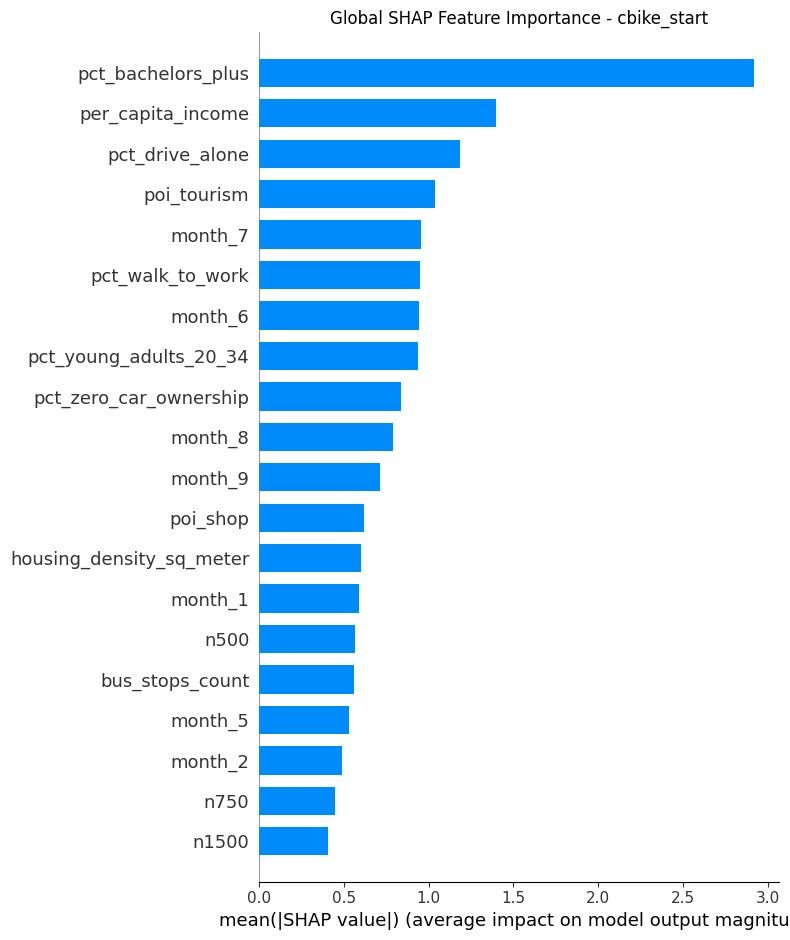

Top 15 by mean |SHAP|:
                     feature  mean_abs_shap
26        pct_bachelors_plus       2.919391
30         per_capita_income       1.399361
27           pct_drive_alone       1.185426
10               poi_tourism       1.038014
42                   month_7       0.956017
29          pct_walk_to_work       0.949086
41                   month_6       0.941493
23    pct_young_adults_20_34       0.937774
24    pct_zero_car_ownership       0.838684
43                   month_8       0.790250
44                   month_9       0.710110
13                  poi_shop       0.617634
32  housing_density_sq_meter       0.600123
33                   month_1       0.590871
1                       n500       0.564404

🔍 Computing SHAP values for cbike_end (global)...


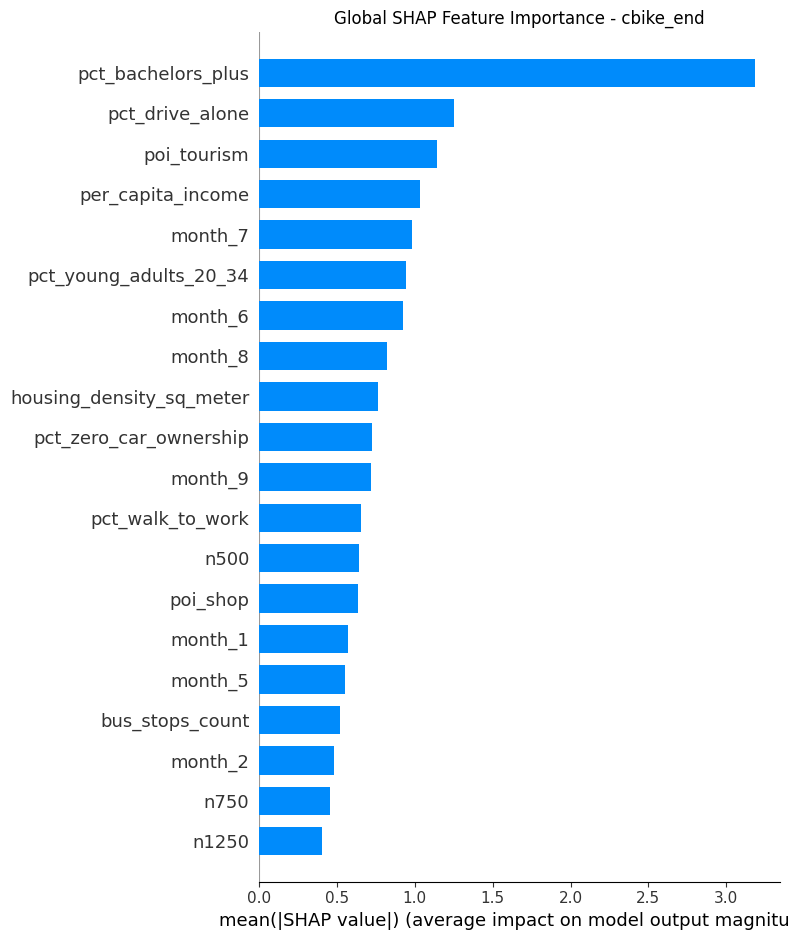

Top 15 by mean |SHAP|:
                     feature  mean_abs_shap
26        pct_bachelors_plus       3.185511
27           pct_drive_alone       1.248438
10               poi_tourism       1.140806
30         per_capita_income       1.030789
42                   month_7       0.980286
23    pct_young_adults_20_34       0.942472
41                   month_6       0.922455
43                   month_8       0.821505
32  housing_density_sq_meter       0.761358
24    pct_zero_car_ownership       0.722765
44                   month_9       0.720838
29          pct_walk_to_work       0.652027
1                       n500       0.643211
13                  poi_shop       0.636223
33                   month_1       0.572296

🔍 Computing SHAP values for ebike_start (global)...


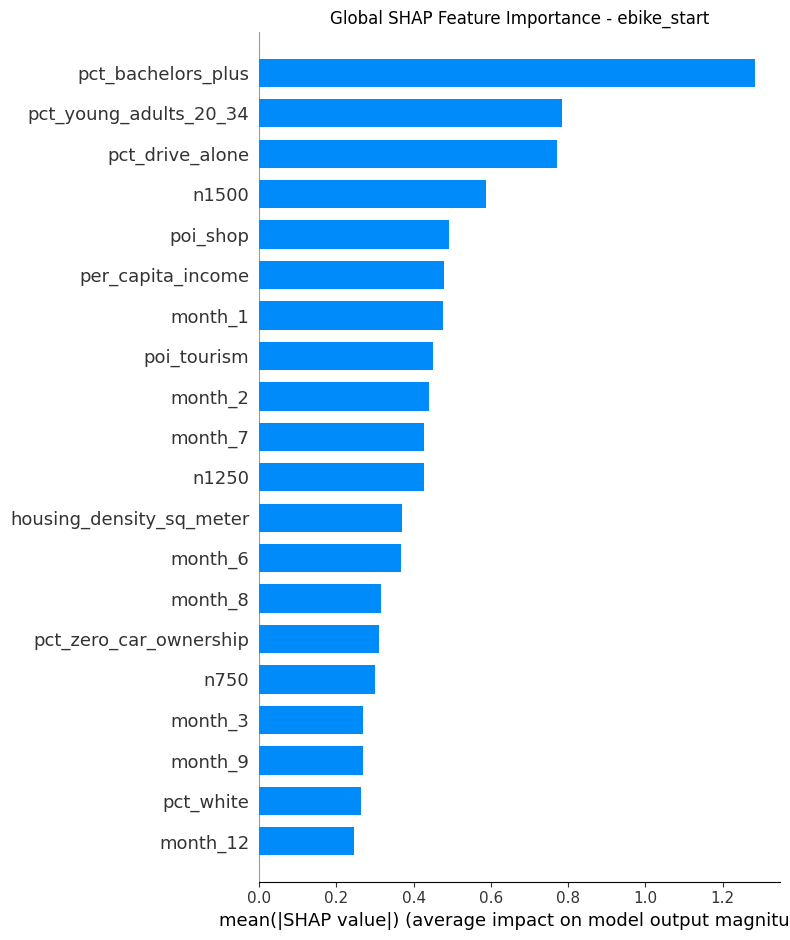

Top 15 by mean |SHAP|:
                     feature  mean_abs_shap
26        pct_bachelors_plus       1.283968
23    pct_young_adults_20_34       0.782763
27           pct_drive_alone       0.770973
5                      n1500       0.586262
13                  poi_shop       0.492181
30         per_capita_income       0.477772
33                   month_1       0.475558
10               poi_tourism       0.450325
37                   month_2       0.438822
42                   month_7       0.426125
4                      n1250       0.425928
32  housing_density_sq_meter       0.370891
41                   month_6       0.367877
43                   month_8       0.315668
24    pct_zero_car_ownership       0.311568

🔍 Computing SHAP values for ebike_end (global)...


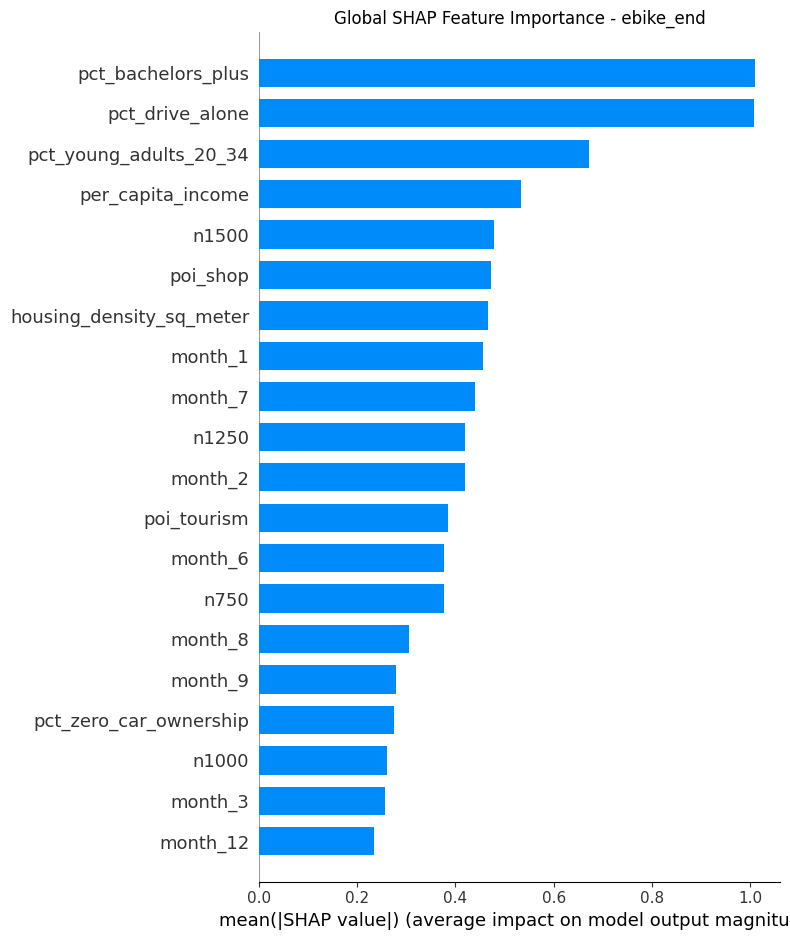

Top 15 by mean |SHAP|:
                     feature  mean_abs_shap
26        pct_bachelors_plus       1.010398
27           pct_drive_alone       1.007582
23    pct_young_adults_20_34       0.672017
30         per_capita_income       0.533782
5                      n1500       0.477487
13                  poi_shop       0.471728
32  housing_density_sq_meter       0.465953
33                   month_1       0.455766
42                   month_7       0.439556
4                      n1250       0.419146
37                   month_2       0.418568
10               poi_tourism       0.384911
41                   month_6       0.377582
2                       n750       0.377526
43                   month_8       0.304516


In [18]:
# 15. Global SHAP Feature Importance per Target
print('\n' + '='*60)
print('GLOBAL SHAP FEATURE IMPORTANCE')
print('='*60)

shap_summary_tables = {}

for target in target_variables:
    print(f"\n🔍 Computing SHAP values for {target} (global)...")
    model = trained_models[target]

    explainer = shap.TreeExplainer(model)
    # Use larger subset for better accuracy on summary
    sample_X = training_data[feature_columns].sample(n=min(15000, len(training_data)), random_state=42)
    shap_values = explainer.shap_values(sample_X)

    # Summary plot (bar)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, sample_X, plot_type='bar', show=False)
    plt.title(f'Global SHAP Feature Importance - {target}')
    plt.tight_layout()
    plt.show()

    # Build table of mean |SHAP| per feature
    mean_abs_shap = np.abs(shap_values).mean(axis=0)
    summary_df = pd.DataFrame({'feature': sample_X.columns, 'mean_abs_shap': mean_abs_shap})
    summary_df = summary_df.sort_values('mean_abs_shap', ascending=False)
    shap_summary_tables[target] = summary_df

    print('Top 15 by mean |SHAP|:')
    print(summary_df.head(15).round(6))


In [19]:
# 16. Instance-Level Errors and Worst Cases Selection
print('\n' + '='*60)
print('INSTANCE-LEVEL ERRORS AND WORST CASES')
print('='*60)

instance_errors = {}
worst_cases_indices = {}

for target in target_variables:
    print(f"\n🔎 Analyzing instance-level errors for {target}...")
    y_true = test_results[target]['y_test'].reset_index(drop=True)
    y_pred = pd.Series(test_results[target]['y_test_pred']).reset_index(drop=True)

    errors = y_true - y_pred
    abs_errors = errors.abs()

    df_err = pd.DataFrame({
        'y_true': y_true,
        'y_pred': y_pred,
        'error': errors,
        'abs_error': abs_errors
    })
    instance_errors[target] = df_err

    top_k = 100
    worst_idx = df_err.sort_values('abs_error', ascending=False).head(top_k).index
    worst_cases_indices[target] = worst_idx

    print(f"Top {top_k} worst absolute errors selected.")



INSTANCE-LEVEL ERRORS AND WORST CASES

🔎 Analyzing instance-level errors for cbike_start...
Top 100 worst absolute errors selected.

🔎 Analyzing instance-level errors for cbike_end...
Top 100 worst absolute errors selected.

🔎 Analyzing instance-level errors for ebike_start...
Top 100 worst absolute errors selected.

🔎 Analyzing instance-level errors for ebike_end...
Top 100 worst absolute errors selected.


In [20]:
# 17. Error Attribution with SHAP on Worst Cases
print('\n' + '='*60)
print('ERROR ATTRIBUTION ON WORST CASES (SHAP)')
print('='*60)

error_contrib_tables = {}

for target in target_variables:
    print(f"\n📌 SHAP attributions for {target} worst errors...")
    model = trained_models[target]

    # Build test feature matrix aligned with errors
    X_test = test_data[feature_columns].reset_index(drop=True)
    worst_idx = worst_cases_indices[target]
    X_worst = X_test.loc[worst_idx]

    explainer = shap.TreeExplainer(model)
    shap_vals = explainer.shap_values(X_worst)
    base_value = explainer.expected_value

    # Per-instance contribution magnitudes
    contrib_abs = np.abs(shap_vals)
    mean_abs_by_feature = contrib_abs.mean(axis=0)

    contrib_df = pd.DataFrame({
        'feature': feature_columns,
        'mean_abs_shap_on_worst': mean_abs_by_feature
    }).sort_values('mean_abs_shap_on_worst', ascending=False)

    error_contrib_tables[target] = contrib_df
    print('Top 15 contributors on worst errors:')
    print(contrib_df.head(15).round(6))



ERROR ATTRIBUTION ON WORST CASES (SHAP)

📌 SHAP attributions for cbike_start worst errors...
Top 15 contributors on worst errors:
                     feature  mean_abs_shap_on_worst
26        pct_bachelors_plus                8.754562
42                   month_7                6.923692
30         per_capita_income                5.039739
10               poi_tourism                4.245966
27           pct_drive_alone                3.693023
41                   month_6                3.452156
9            bus_stops_count                3.346270
43                   month_8                3.156089
29          pct_walk_to_work                2.979577
1                       n500                2.330356
32  housing_density_sq_meter                2.241031
44                   month_9                2.223722
24    pct_zero_car_ownership                2.200963
13                  poi_shop                2.189396
15                 pct_white                2.185304

📌 SHAP attributions 


SHAP WATERFALL PLOTS FOR EXEMPLARS

📊 Waterfall exemplars for cbike_start...
  - worst case index 1192, abs_error=66.6759


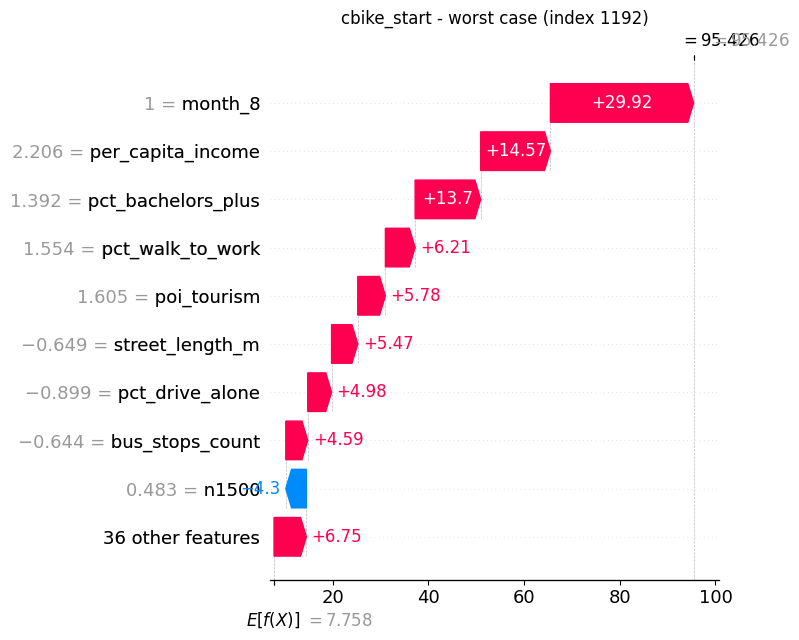

  - median case index 3248, abs_error=0.6468


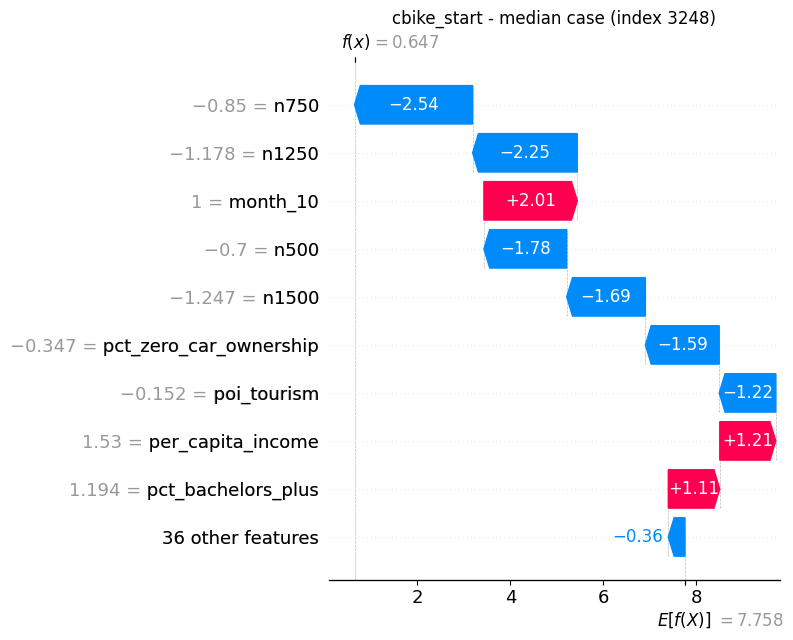

  - best case index 1410, abs_error=0.0000


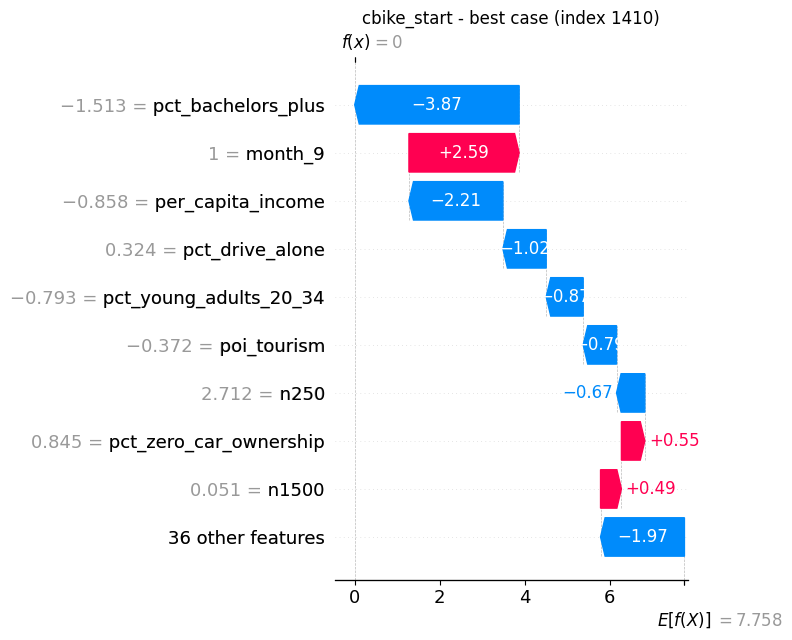


📊 Waterfall exemplars for cbike_end...
  - worst case index 15477, abs_error=82.2290


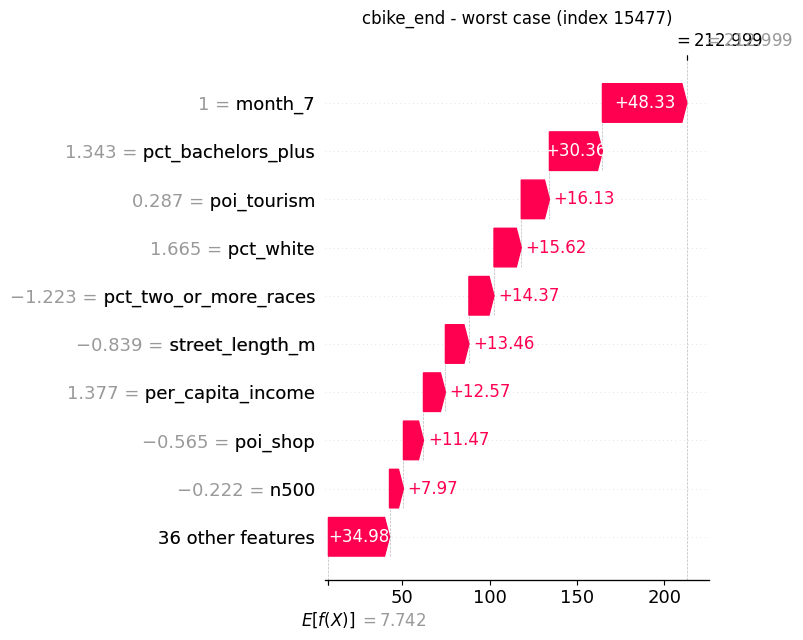

  - median case index 10958, abs_error=0.6817


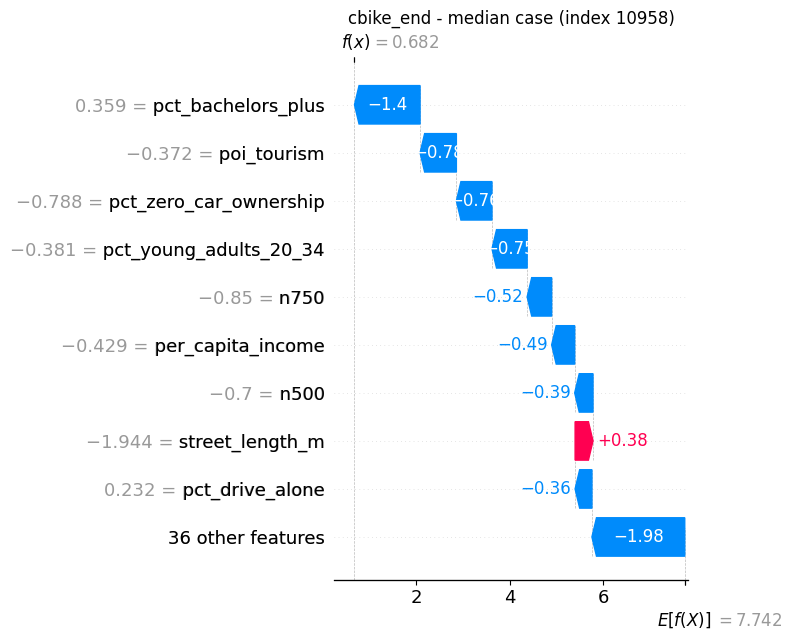

  - best case index 15098, abs_error=0.0001


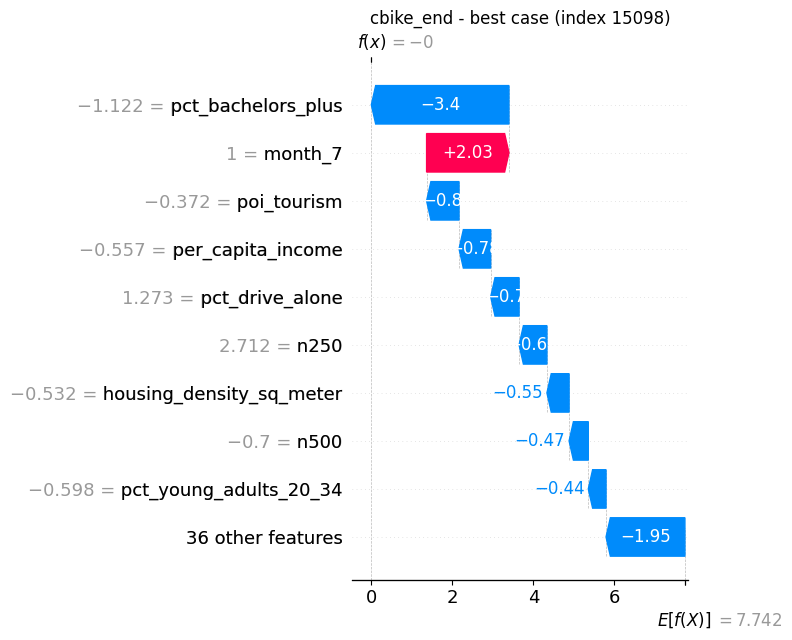


📊 Waterfall exemplars for ebike_start...
  - worst case index 15309, abs_error=67.0462


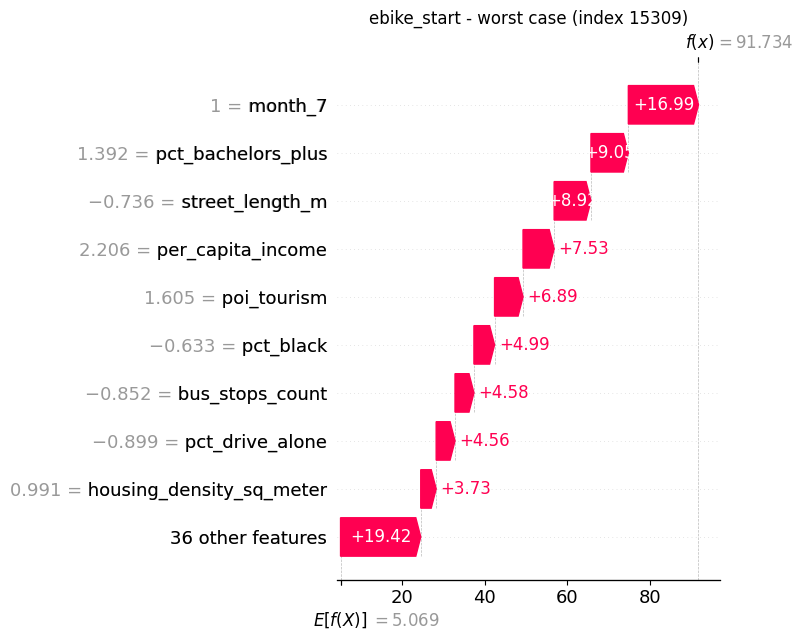

  - median case index 1483, abs_error=0.5601


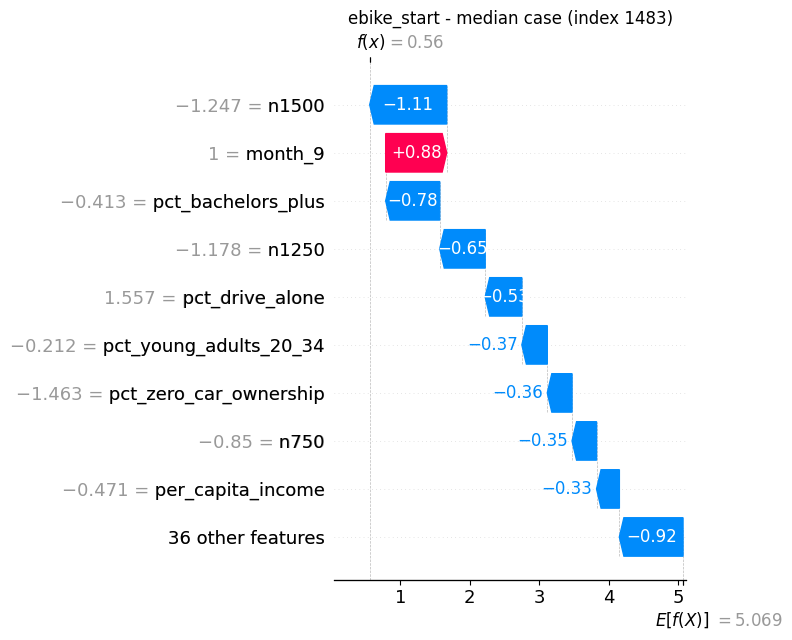

  - best case index 12502, abs_error=0.0000


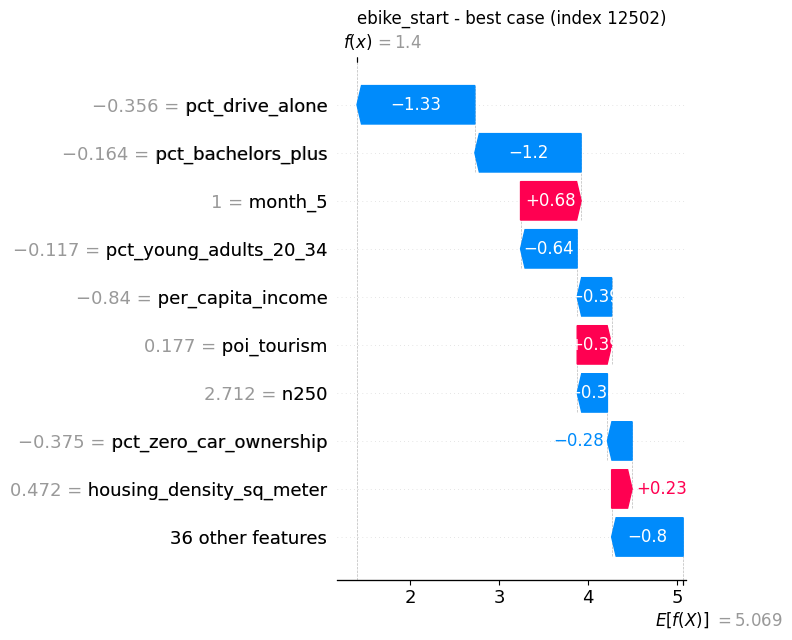


📊 Waterfall exemplars for ebike_end...
  - worst case index 15309, abs_error=62.3451


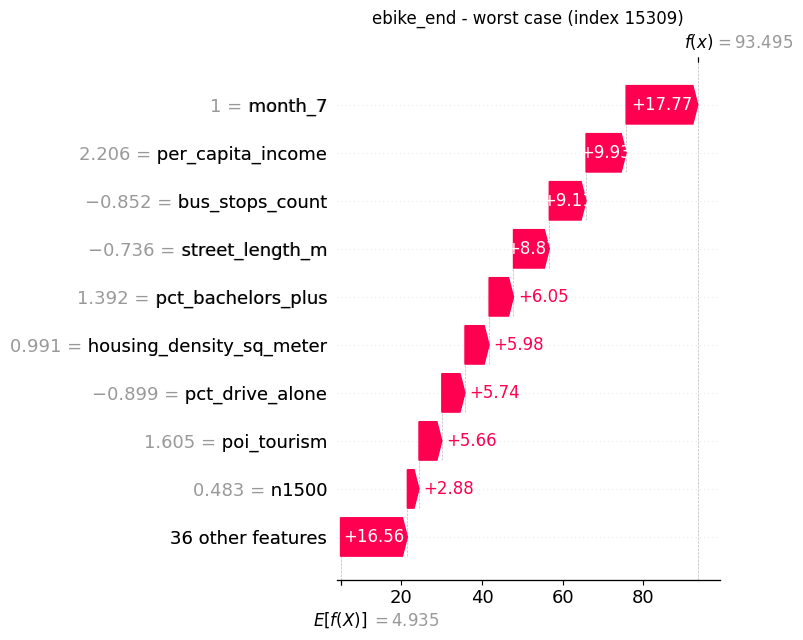

  - median case index 3699, abs_error=0.5428


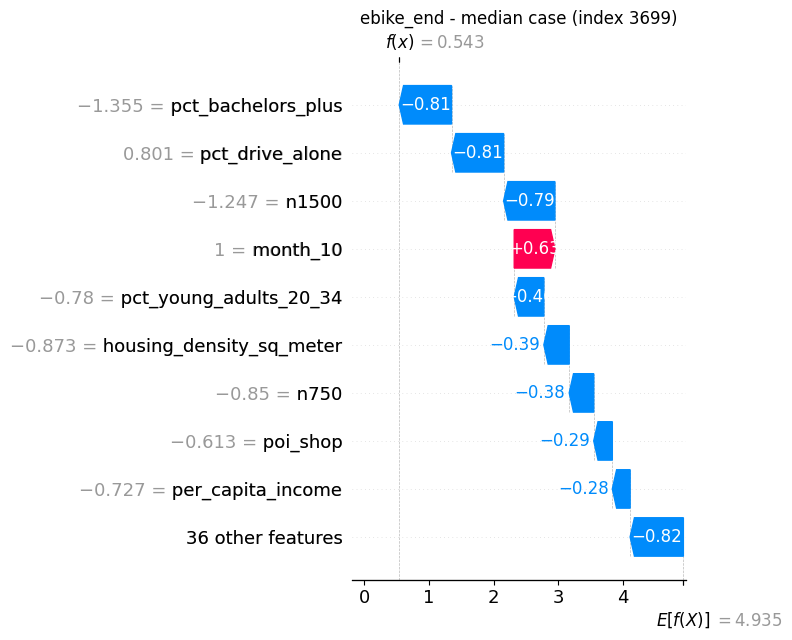

  - best case index 6571, abs_error=0.0000


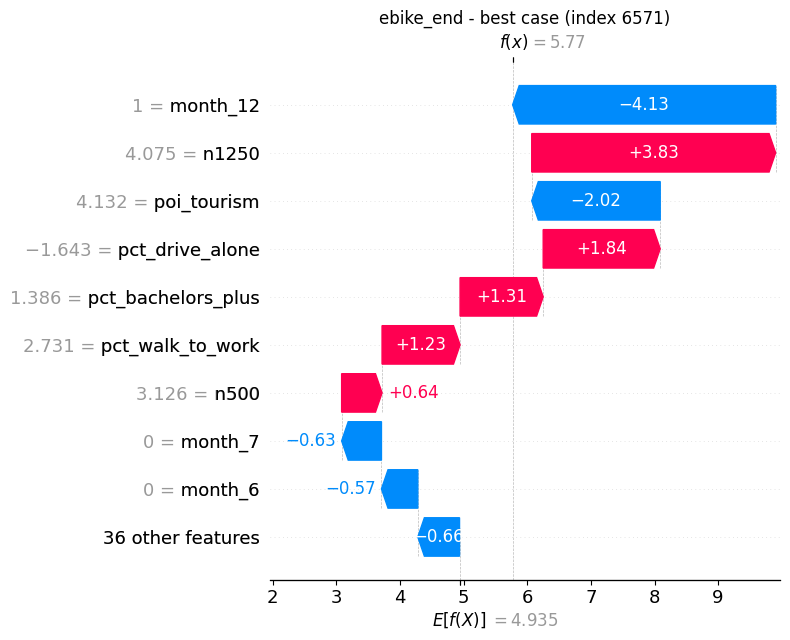

In [23]:
# 18. Waterfall Plots for Exemplars (Worst, Median, Best Errors)
print('\n' + '='*60)
print('SHAP WATERFALL PLOTS FOR EXEMPLARS')
print('='*60)

for target in target_variables:
    print(f"\n📊 Waterfall exemplars for {target}...")
    model = trained_models[target]
    explainer = shap.TreeExplainer(model)

    X_test = test_data[feature_columns].reset_index(drop=True)
    df_err = instance_errors[target]

    # Select exemplar indices
    worst_idx = df_err.sort_values('abs_error', ascending=False).index[0]
    median_idx = df_err['abs_error'].sort_values().index[len(df_err)//2]
    best_idx = df_err.sort_values('abs_error').index[0]

    exemplar_indices = [('worst', worst_idx), ('median', median_idx), ('best', best_idx)]

    for label, idx in exemplar_indices:
        x_instance = X_test.loc[idx:idx]
        shap_vals = explainer.shap_values(x_instance)
        expected_value = explainer.expected_value
        # Ensure scalar expected value
        if isinstance(expected_value, (list, np.ndarray)):
            expected_value = np.array(expected_value).reshape(-1)[0]

        print(f"  - {label} case index {idx}, abs_error={df_err.loc[idx, 'abs_error']:.4f}")
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_vals[0],
                base_values=expected_value,
                data=x_instance.values[0],
                feature_names=feature_columns
            ),
            show=False
        )
        ax = plt.gca()
        ax.set_title(f'{target} - {label} case (index {idx})')
        plt.tight_layout()
        plt.show()
        plt.close()


In [24]:
# 19. Save SHAP Artifacts
print('\n' + '='*60)
print('SAVING SHAP ARTIFACTS')
print('='*60)

# Save global summary tables
for target, df_summary in shap_summary_tables.items():
    out_path = f'result/shap_global_summary_{target}.csv'
    df_summary.to_csv(out_path, index=False)
    print(f'✅ Saved {out_path}')

# Save error contribution tables
for target, df_contrib in error_contrib_tables.items():
    out_path = f'result/shap_worst_error_contrib_{target}.csv'
    df_contrib.to_csv(out_path, index=False)
    print(f'✅ Saved {out_path}')

# Save instance-level errors
for target, df_err in instance_errors.items():
    out_path = f'result/instance_errors_{target}.csv'
    df_err.to_csv(out_path, index=False)
    print(f'✅ Saved {out_path}')



SAVING SHAP ARTIFACTS
✅ Saved result/shap_global_summary_cbike_start.csv
✅ Saved result/shap_global_summary_cbike_end.csv
✅ Saved result/shap_global_summary_ebike_start.csv
✅ Saved result/shap_global_summary_ebike_end.csv
✅ Saved result/shap_worst_error_contrib_cbike_start.csv
✅ Saved result/shap_worst_error_contrib_cbike_end.csv
✅ Saved result/shap_worst_error_contrib_ebike_start.csv
✅ Saved result/shap_worst_error_contrib_ebike_end.csv
✅ Saved result/instance_errors_cbike_start.csv
✅ Saved result/instance_errors_cbike_end.csv
✅ Saved result/instance_errors_ebike_start.csv
✅ Saved result/instance_errors_ebike_end.csv
